**Global YouTube Statistics Analysis**

**Analyzing Success Factors and User Trends in the World's Top YouTube Channels**

In a comprehensive analysis of 995 of the world's top YouTube channels 2023, we delve into the multifaceted factors that contribute to their success and discern user trends shaping the digital landscape. By dissecting key metrics and demographic insights, we unearth actionable recommendations for aspiring content creators seeking to build a thriving presence on YouTube.


In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# prompt: read from google drive

# Change current directory to the content directory
%cd /content/drive/MyDrive

# List all files and folders in the current directory
!ls

# Read a specific file into a DataFrame
df = pd.read_csv('Global YouTube Statistics.csv', encoding="latin-1")

df


/content/drive/MyDrive
 2021-1-4-BA.xlsx				       'Getting started.pdf'
 2021-4-8-BA.xlsx				       'Global YouTube Statistics.csv'
 2021-9-12-BA.xlsx				        Mami
 2022-1-4-BA.xlsx				        NLP
 2022-5-6-7-BA.xlsx				        Painting
 2-prepocessingmodel-JULY.ipynb			        photocloude
 8-30-1-nofuel-Location-mlp-outlier-TGD-state.ipynb     preprocessed_data.csv
 8-30-2-nofuel-Location-mlp-outlier-TGD-NOSTATE.ipynb   Sephora
 BI-CSR-Scorecard-Mockup.pptx			        Sephora.zip
 BI-Omnichannel-Mockup.pptx			        Shokr-kar-badaramad-ali-daram
'Colab Notebooks'				       'Soft Filling 702.rar'
'Experience painting music '			       'What up'
 fasl2_newversion.docx				        WORK


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [4]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

#**Preporces Data**

In [6]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [7]:
df.duplicated().sum()

0

In [8]:
#remove special characters
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

#Youtuber feature
df['Youtuber'] = df['Youtuber'].apply(lambda x: re.sub(pattern, '', x))
df['Youtuber'] = df['Youtuber'].str.strip()
df['Youtuber'] =df['Youtuber'].str.lstrip('- ')

In [9]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [10]:
min_created_year = df["created_year"].min()
records_min_created_year = df[df["created_year"] == min_created_year]
print(records_min_created_year)

     rank Youtuber  subscribers   video views         category    Title  \
101   102  YouTube     36300000  3.010785e+09  News & Politics  YouTube   

     uploads        Country Abbreviation   channel_type  ...  \
101      744  United States           US  Entertainment  ...   

     subscribers_for_last_30_days  created_year  created_month  created_date  \
101                      300000.0        1970.0            Jan           1.0   

     Gross tertiary education enrollment (%)   Population  Unemployment rate  \
101                                     88.2  328239523.0               14.7   

     Urban_population  Latitude  Longitude  
101       270663028.0  37.09024 -95.712891  

[1 rows x 28 columns]


In [11]:
df.drop(df[df['created_year'] == 1970.0].index, inplace=True)


#**Who are the Top 15 YouTubers in terms of subscribers?**

<ipython-input-12-85c79be7abe0>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-12-85c79be7abe0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subscribers', y='Youtuber', data=top_15_subscribers, palette='viridis')


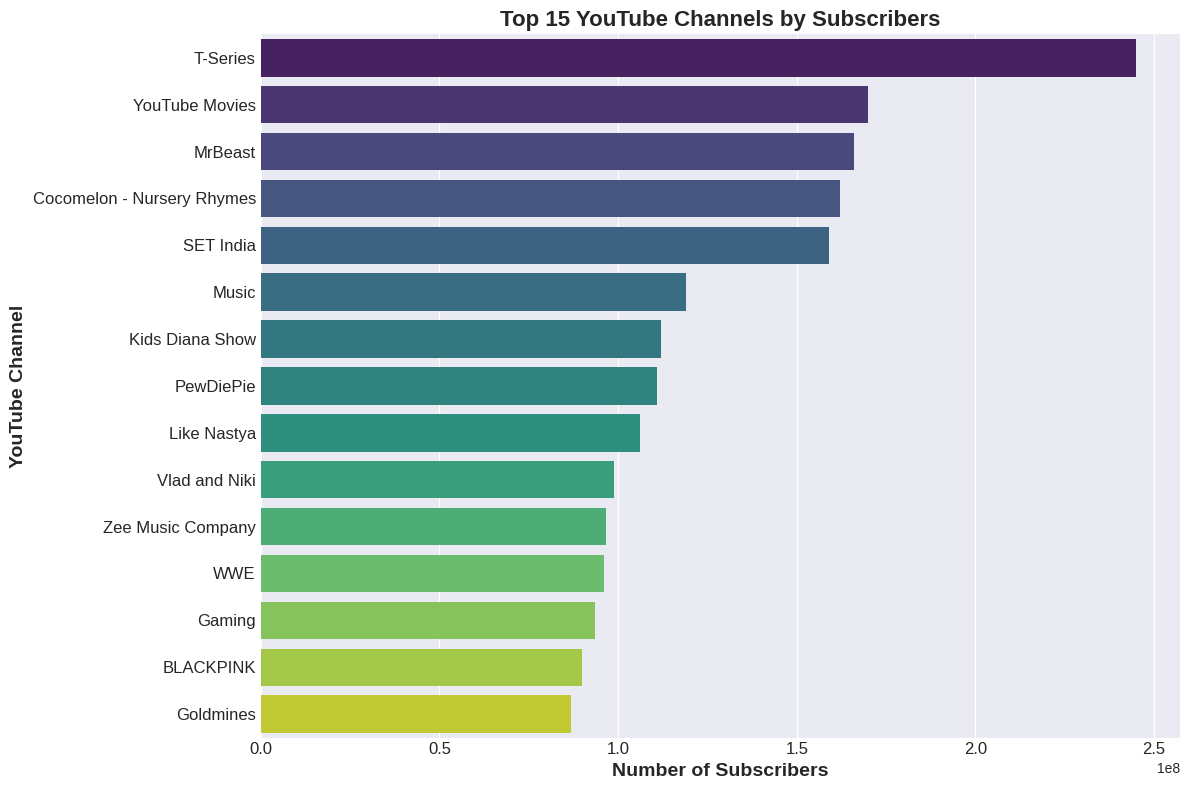

In [12]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-darkgrid')

# Sort the DataFrame by 'subscribers' in descending order and select the top 15 channels
top_15_subscribers = df.nlargest(15, 'subscribers')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='subscribers', y='Youtuber', data=top_15_subscribers, palette='viridis')
plt.xlabel('Number of Subscribers', fontsize=14, fontweight='bold')
plt.ylabel('YouTube Channel', fontsize=14, fontweight='bold')
plt.title('Top 15 YouTube Channels by Subscribers', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


#**Who are the Top 15 YouTubers with the highest views?**

<ipython-input-13-b76cec6ad04a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='video views', y='Youtuber', data=top_15_views, palette='viridis')


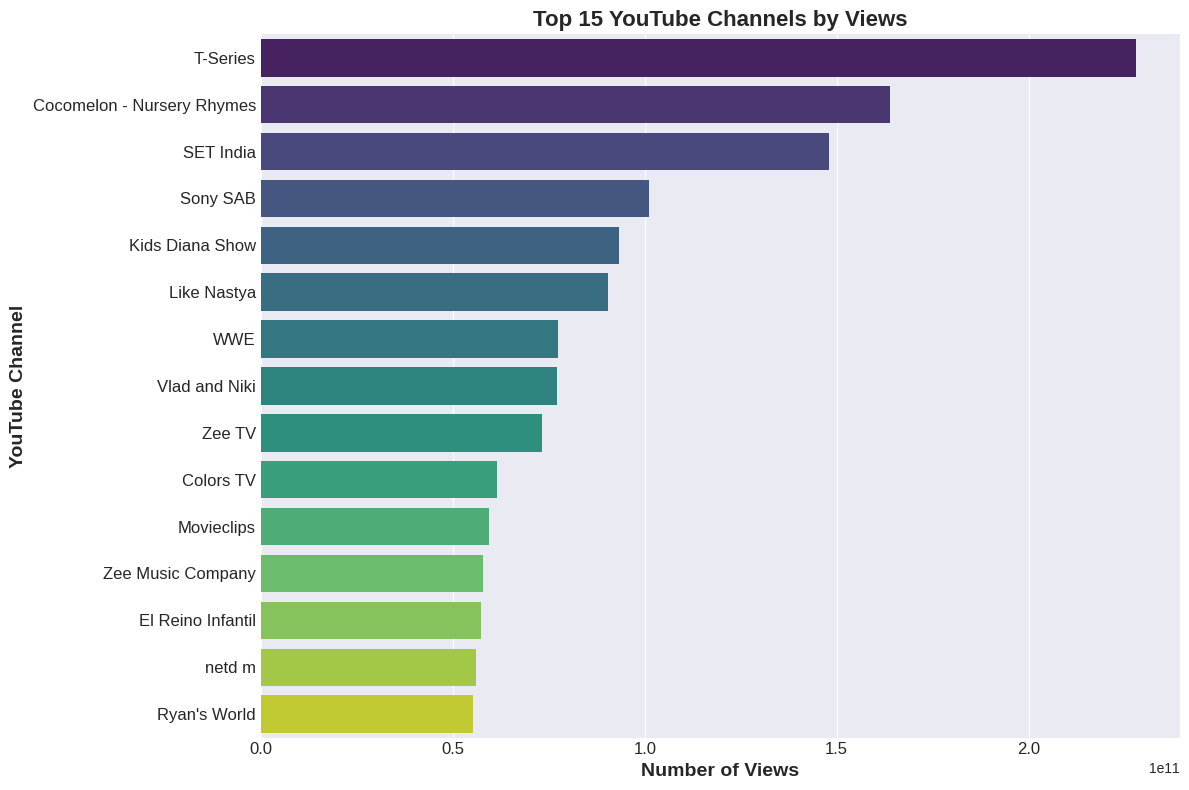

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'video views' in descending order and select the top 15 channels
top_15_views = df.nlargest(15, 'video views')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='video views', y='Youtuber', data=top_15_views, palette='viridis')
plt.xlabel('Number of Views', fontsize=14, fontweight='bold')
plt.ylabel('YouTube Channel', fontsize=14, fontweight='bold')
plt.title('Top 15 YouTube Channels by Views', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



#Compare viewers and Subscribers

<ipython-input-14-420fa3f27edd>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='video views', y='Youtuber', data=top_15_views, palette='viridis')
<ipython-input-14-420fa3f27edd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subscribers', y='Youtuber', data=top_15_subscribers, palette='viridis')


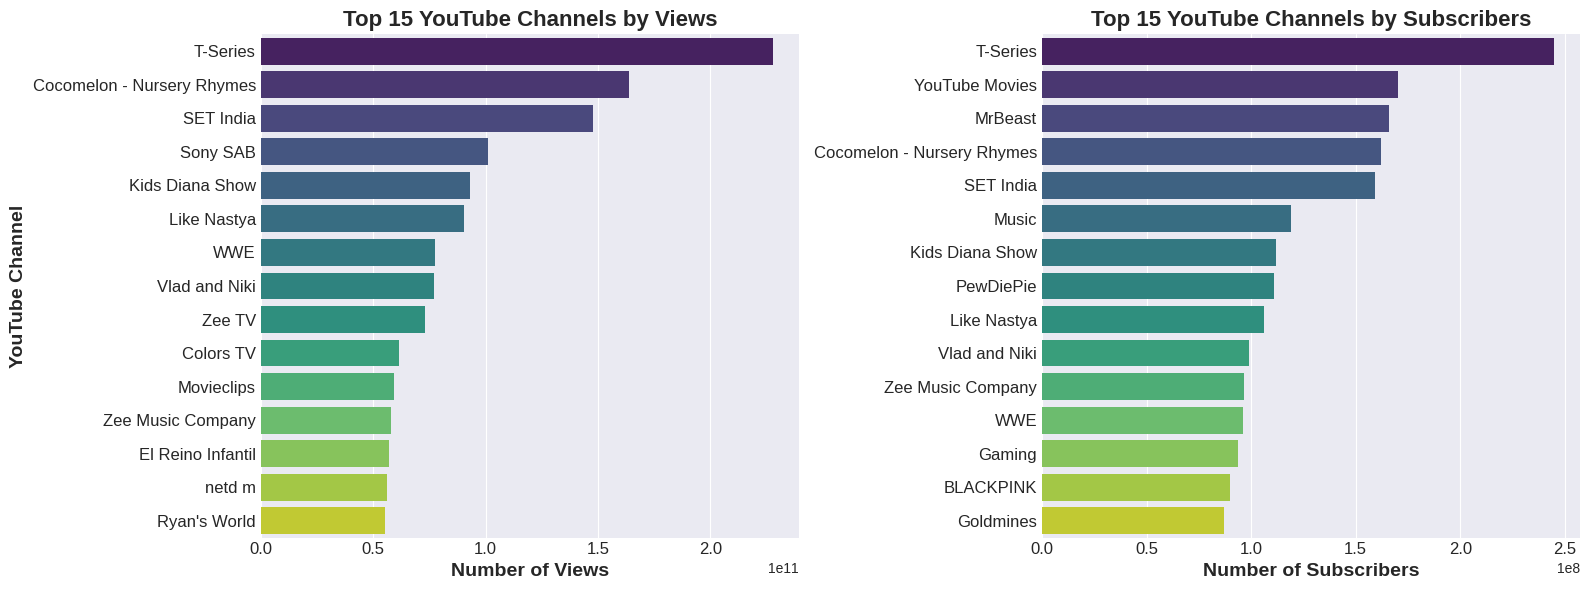

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns 'Youtuber', 'video views', and 'subscribers'

# Sort the DataFrame by 'video views' in descending order and select the top 15 channels
top_15_views = df.nlargest(15, 'video views')

# Sort the DataFrame by 'subscribers' in descending order and select the top 15 channels
top_15_subscribers = df.nlargest(15, 'subscribers')

# Plotting
plt.figure(figsize=(16, 6))

# Plotting top 15 channels by views
plt.subplot(1, 2, 1)
sns.barplot(x='video views', y='Youtuber', data=top_15_views, palette='viridis')
plt.xlabel('Number of Views', fontsize=14, fontweight='bold')
plt.ylabel('YouTube Channel', fontsize=14, fontweight='bold')
plt.title('Top 15 YouTube Channels by Views', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plotting top 15 channels by subscribers
plt.subplot(1, 2, 2)
sns.barplot(x='subscribers', y='Youtuber', data=top_15_subscribers, palette='viridis')
plt.xlabel('Number of Subscribers', fontsize=14, fontweight='bold')
plt.ylabel('', fontsize=14, fontweight='bold')  # Empty ylabel for aesthetic purposes
plt.title('Top 15 YouTube Channels by Subscribers', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [15]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


#Monitor Correlation HeatMap

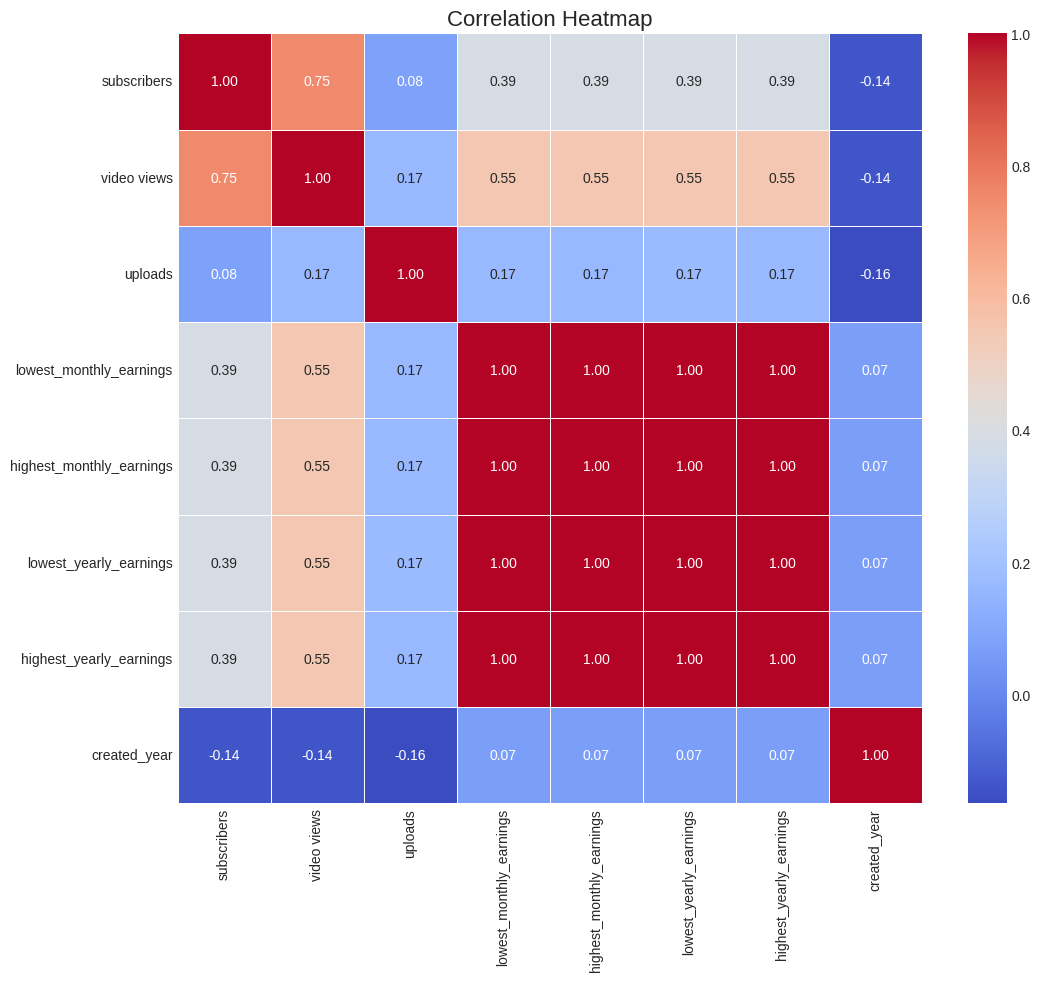

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select numerical columns for correlation analysis
numerical_columns = df[['subscribers','video views', 'uploads', 'lowest_monthly_earnings','highest_monthly_earnings','lowest_yearly_earnings', 'highest_yearly_earnings', 'created_year']]

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()



#**Who are the Top 15 YouTubers by highest Monthly earning? ****

<ipython-input-17-d45eb61b8a6f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='highest_monthly_earnings', y='Youtuber', data=top_15_earnings, palette='viridis')


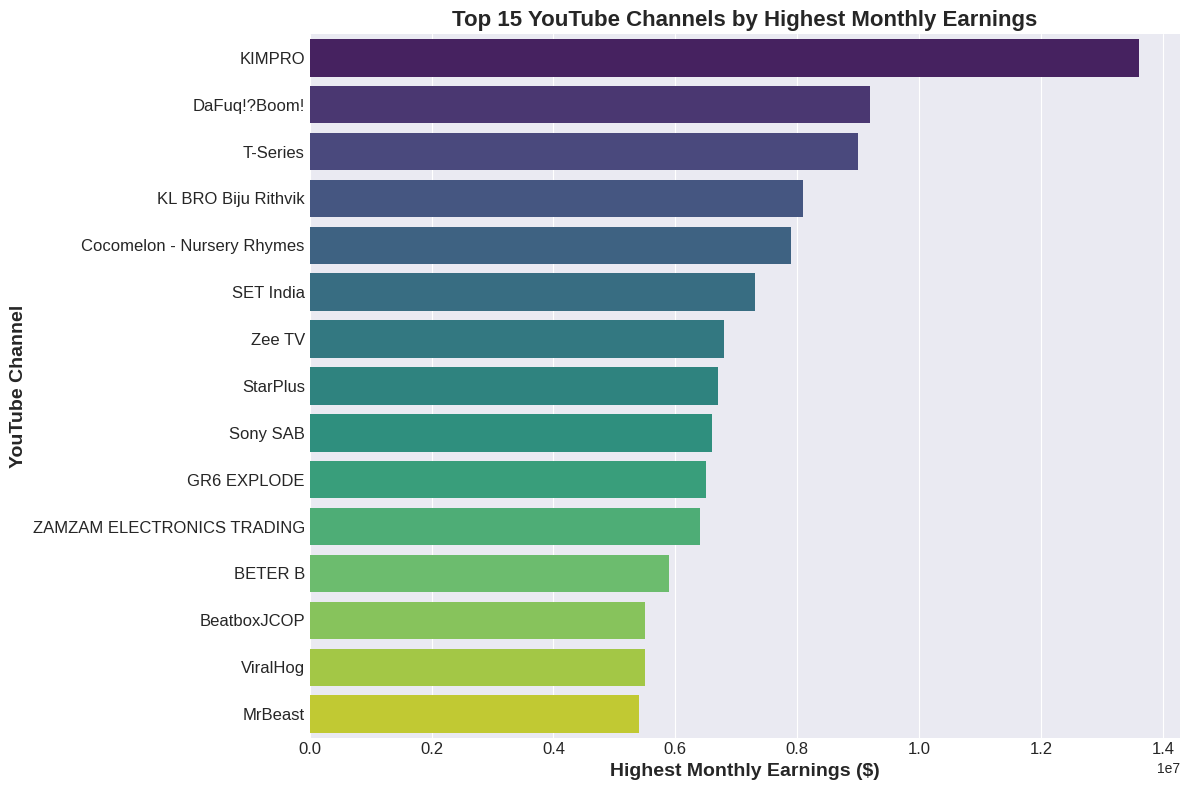

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by highest_monthly_earnings in descending order and select the top 15 channels
top_15_earnings = df.nlargest(15, 'highest_monthly_earnings')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='highest_monthly_earnings', y='Youtuber', data=top_15_earnings, palette='viridis')
plt.xlabel('Highest Monthly Earnings ($)', fontsize=14, fontweight='bold')
plt.ylabel('YouTube Channel', fontsize=14, fontweight='bold')
plt.title('Top 15 YouTube Channels by Highest Monthly Earnings', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


#**What is the relationship between the number of subscribers and the number of video views on YouTube channels? Does having a larger subscriber base typically lead to higher views, and if so, how strong is this relationship?**

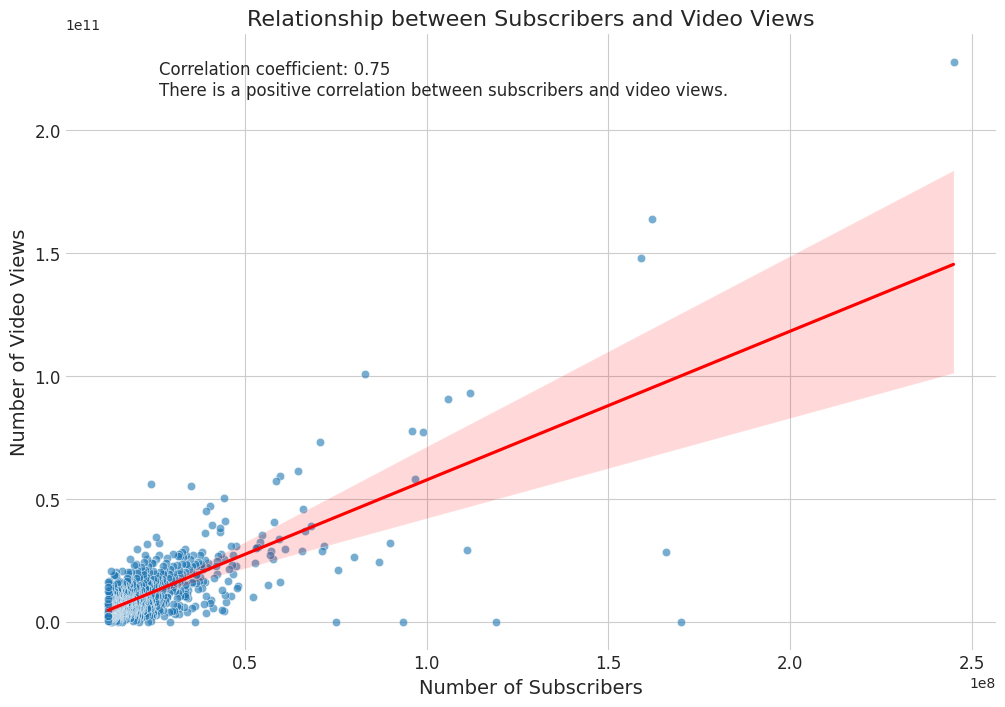

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='subscribers', y='video views', data=df, alpha=0.6)

# Adding line of best fit
sns.regplot(x='subscribers', y='video views', data=df, scatter=False, color='red')

# Calculating correlation coefficient
correlation_coef = np.corrcoef(df['subscribers'], df['video views'])[0, 1]

# Interpretation of correlation coefficient
if correlation_coef > 0:
    interpretation = "There is a positive correlation between subscribers and video views."
elif correlation_coef < 0:
    interpretation = "There is a negative correlation between subscribers and video views."
else:
    interpretation = "There is no correlation between subscribers and video views."

# Adding interpretation to plot
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coef:.2f}\n{interpretation}',
         transform=plt.gca().transAxes, fontsize=12)

plt.xlabel('Number of Subscribers', fontsize=14)
plt.ylabel('Number of Video Views', fontsize=14)
plt.title('Relationship between Subscribers and Video Views', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


#**What is the relationship between the number of uploads on a YouTube channel and its subscriber count as well as its total views? Do channels with more uploads tend to have more subscribers and views, and if so, how strong are these relationships?**

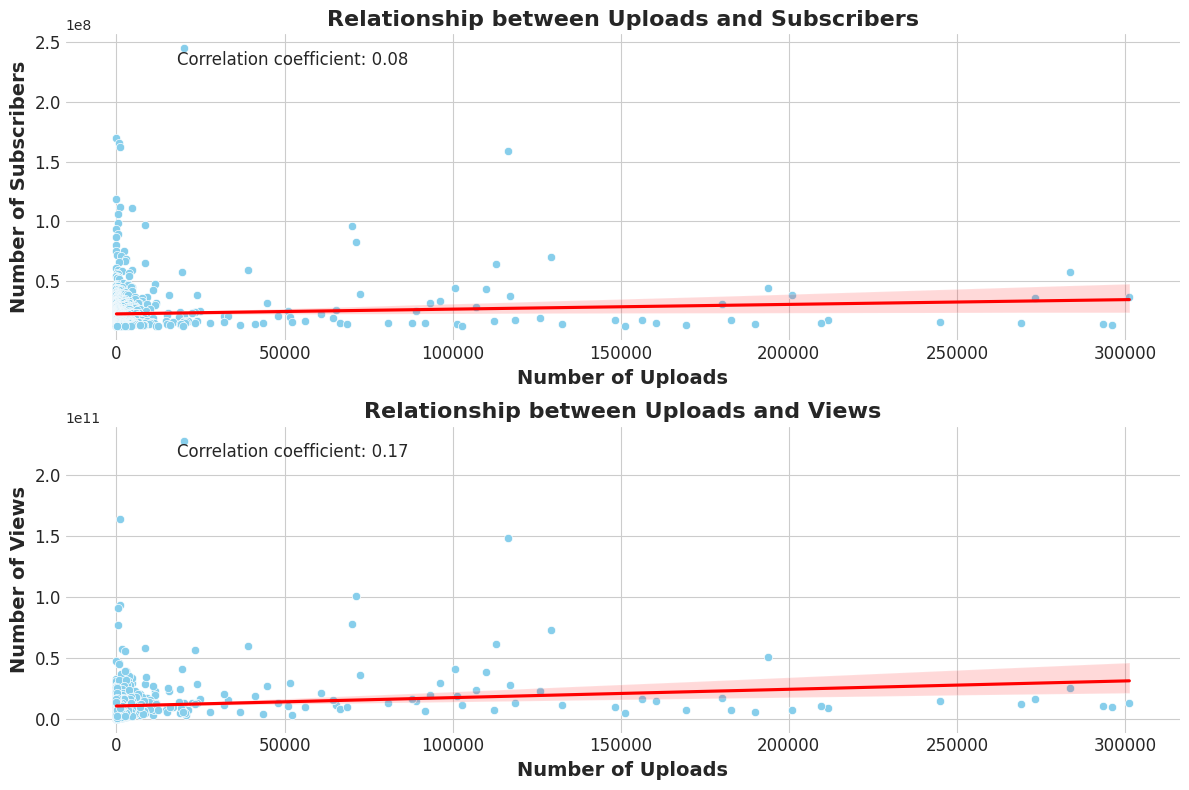

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot for subscribers vs. uploads
plt.subplot(2, 1, 1)  # Create the first subplot
sns.scatterplot(x='uploads', y='subscribers', data=df, color='skyblue')
sns.regplot(x='uploads', y='subscribers', data=df, scatter=False, color='red', label='Trend Line')
plt.xlabel('Number of Uploads', fontsize=14, fontweight='bold')
plt.ylabel('Number of Subscribers', fontsize=14, fontweight='bold')
plt.title('Relationship between Uploads and Subscribers', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Calculating correlation coefficient
correlation_coef_subscribers = df['uploads'].corr(df['subscribers'])

# Adding correlation coefficient to plot
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coef_subscribers:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Scatter plot for views vs. uploads
plt.subplot(2, 1, 2)  # Create the second subplot
sns.scatterplot(x='uploads', y='video views', data=df, color='skyblue')
sns.regplot(x='uploads', y='video views', data=df, scatter=False, color='red', label='Trend Line')
plt.xlabel('Number of Uploads', fontsize=14, fontweight='bold')
plt.ylabel('Number of Views', fontsize=14, fontweight='bold')
plt.title('Relationship between Uploads and Views', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Calculating correlation coefficient
correlation_coef_views = df['uploads'].corr(df['video views'])

# Adding correlation coefficient to plot
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coef_views:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



#**Which categories tend to have a higher average number of uploads?**

<ipython-input-20-ff3c59df5e14>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_uploads_by_category.values, y=average_uploads_by_category.index, palette='viridis')


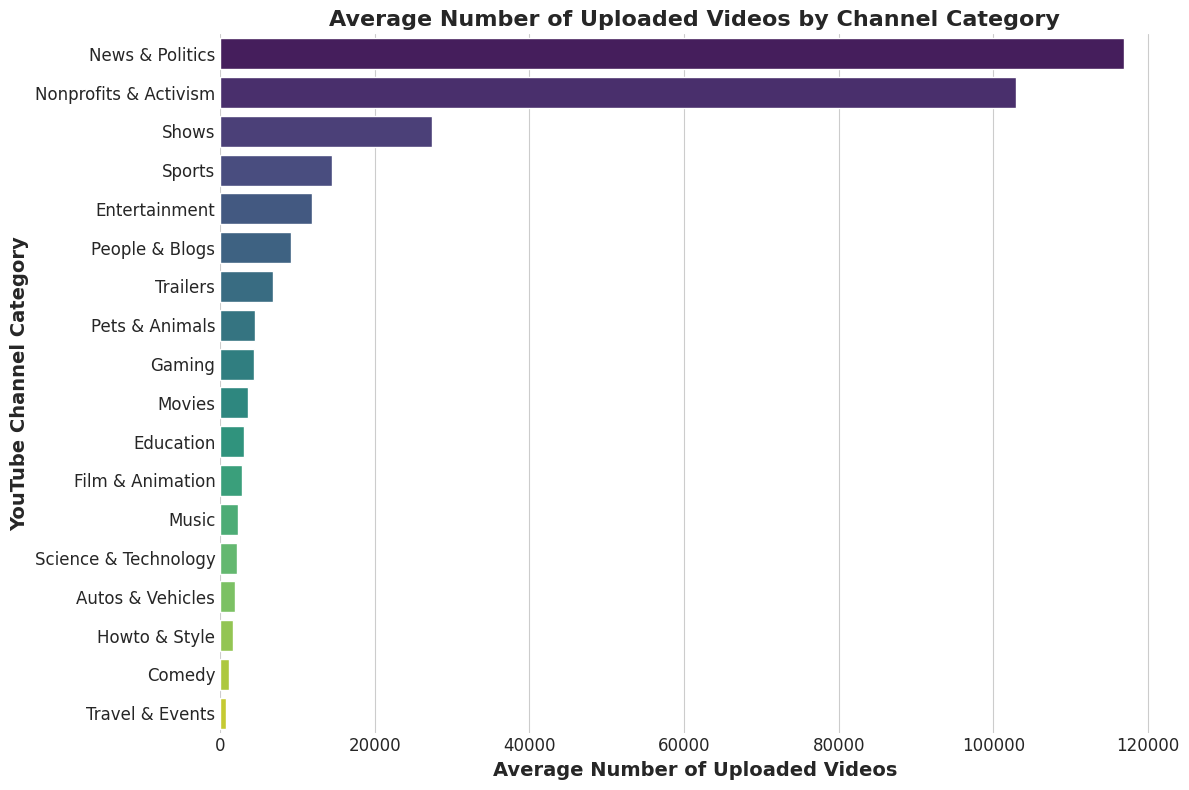

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the DataFrame by 'category' and calculate the average number of uploads
average_uploads_by_category = df.groupby('category')['uploads'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=average_uploads_by_category.values, y=average_uploads_by_category.index, palette='viridis')
plt.xlabel('Average Number of Uploaded Videos', fontsize=14, fontweight='bold')
plt.ylabel('YouTube Channel Category', fontsize=14, fontweight='bold')
plt.title('Average Number of Uploaded Videos by Channel Category', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


* The trend lines are relatively flat, it suggests a weaker correlation.*

#**TOP 15 Countries of Youtuber**

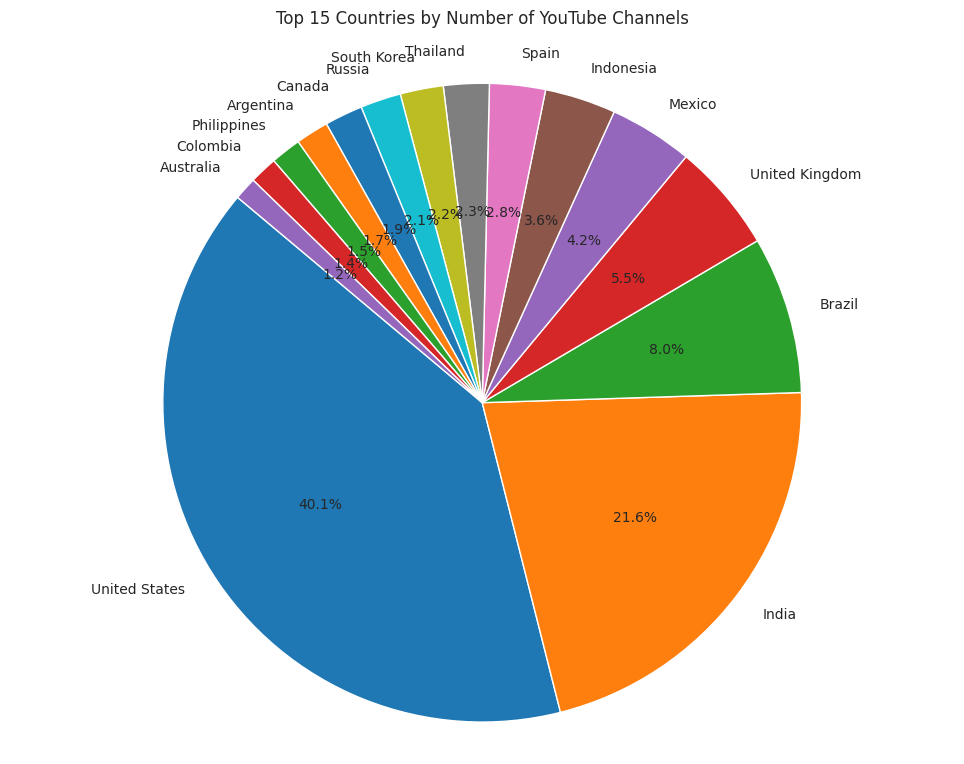

In [21]:
import matplotlib.pyplot as plt

# Count the number of YouTube channels in each country
country_counts = df['Country'].value_counts()

# Select the top 15 countries
top_15_countries = country_counts.head(15)

# Create a pie chart for the top 15 countries
plt.figure(figsize=(10, 8))

# Adjust the layout to add space between title and plot
plt.subplots_adjust(top=0.9)

plt.pie(top_15_countries, labels=top_15_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Countries by Number of YouTube Channels', pad=20)  # Increase pad to adjust distance between title and plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add more space between the pie chart and the labels
plt.tight_layout(pad=2.0)

plt.show()



# **What are the top 15 countries on YouTube based on the maximum number of subscribers, views, and uploads per channel?**

<ipython-input-34-c514ab032365>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_countries.index, y=top_15_countries['subscribers'], order=top_15_countries['subscribers'].sort_values().index, palette='viridis')
<ipython-input-34-c514ab032365>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_countries.index, y=top_15_countries['video views'], order=top_15_countries['video views'].sort_values().index, palette='viridis')
<ipython-input-34-c514ab032365>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_countries.inde

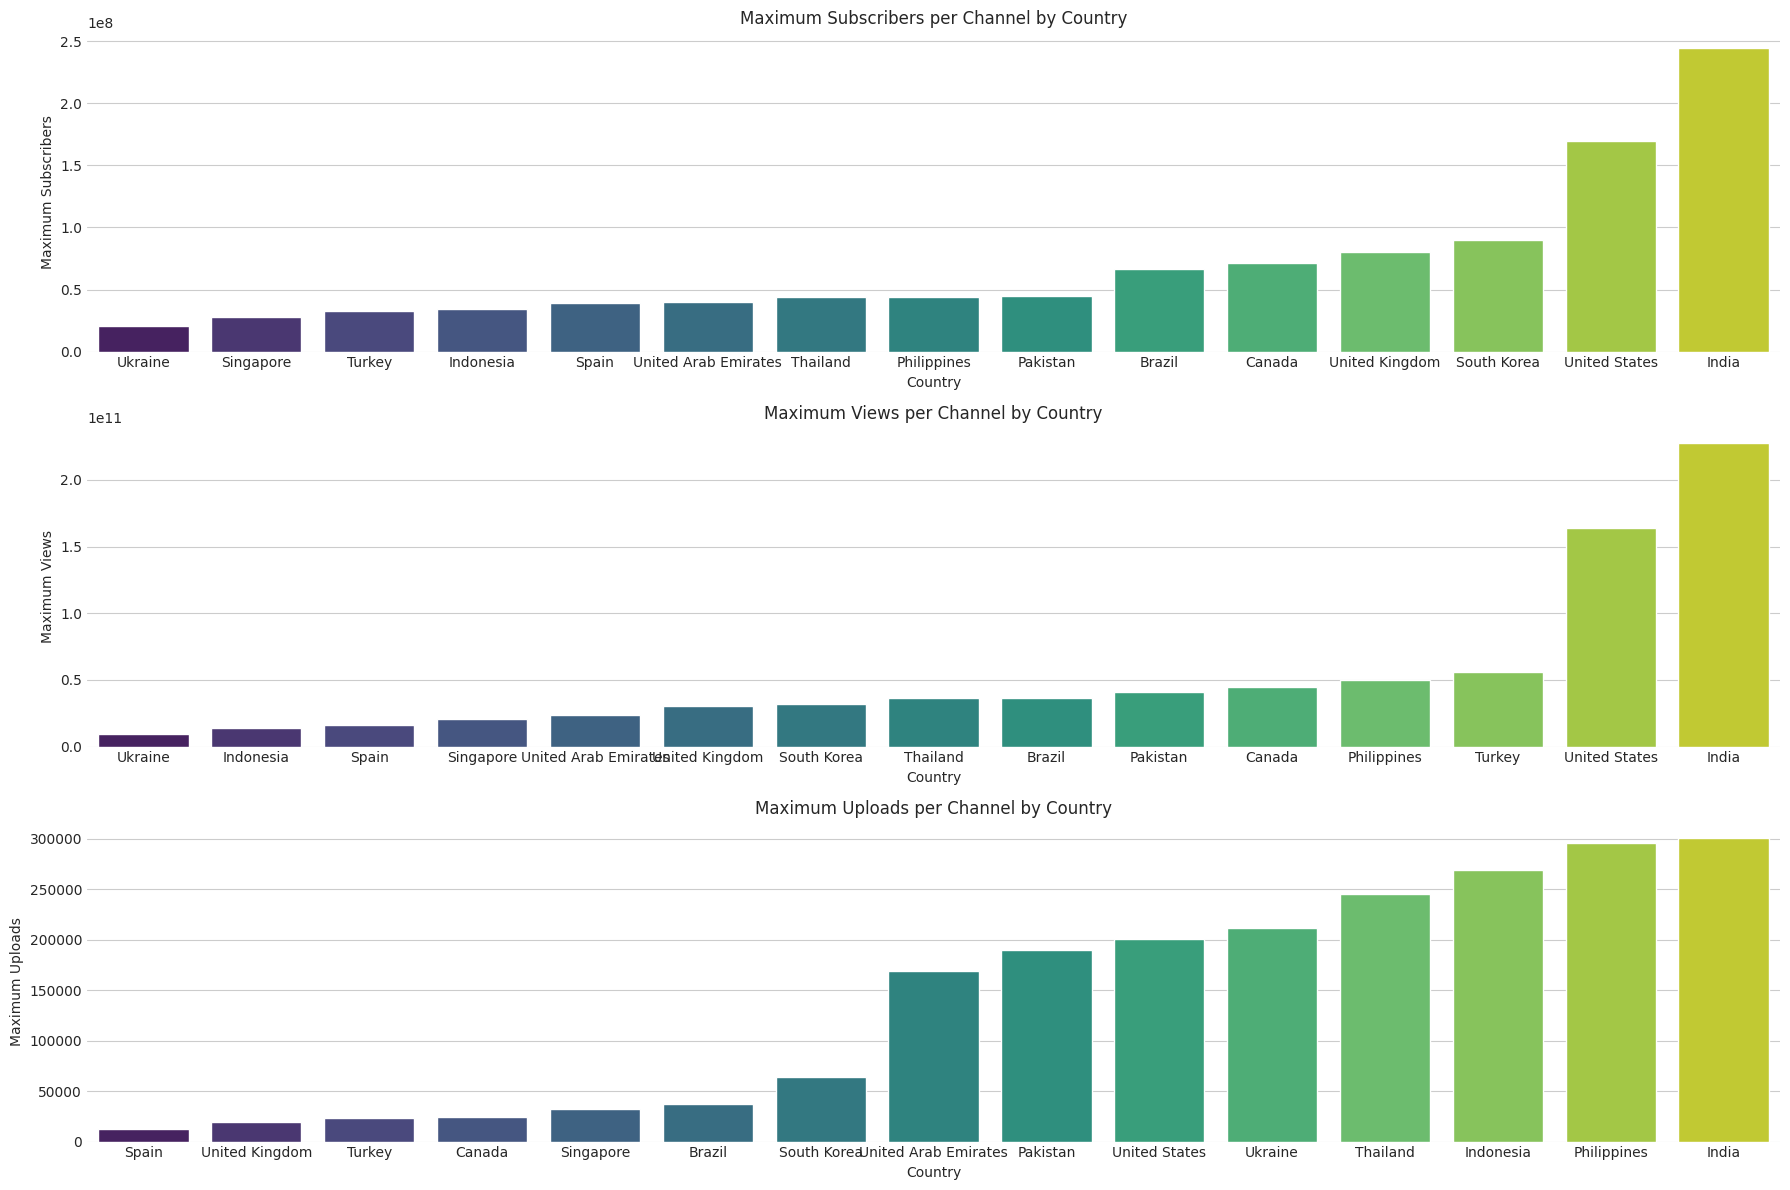

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with missing country data
df_filtered = df.dropna(subset=['Country'])

# Calculate maximum subscribers, views, and uploads per channel for each country
country_max_metrics = df_filtered.groupby('Country').agg({'subscribers': 'max', 'video views': 'max', 'uploads': 'max'})

# Select the top 15 countries by maximum number of uploads
top_15_countries = country_max_metrics.nlargest(15, 'uploads')

# Plot performance metrics by country
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.barplot(x=top_15_countries.index, y=top_15_countries['subscribers'], order=top_15_countries['subscribers'].sort_values().index, palette='viridis')
plt.title('Maximum Subscribers per Channel by Country')
plt.ylabel('Maximum Subscribers')

plt.subplot(3, 1, 2)
sns.barplot(x=top_15_countries.index, y=top_15_countries['video views'], order=top_15_countries['video views'].sort_values().index, palette='viridis')
plt.title('Maximum Views per Channel by Country')
plt.ylabel('Maximum Views')

plt.subplot(3, 1, 3)
sns.barplot(x=top_15_countries.index, y=top_15_countries['uploads'], order=top_15_countries['uploads'].sort_values().index, palette='viridis')
plt.title('Maximum Uploads per Channel by Country')
plt.ylabel('Maximum Uploads')

plt.tight_layout()
plt.show()



# **What are the average numbers of subscribers, views, and uploads per channel in the top 15 countries, and how does Canada compare to these averages?**

<ipython-input-37-c8939c22674d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_data.index, y=top_countries_data['subscribers'], palette='viridis')
<ipython-input-37-c8939c22674d>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_data.index, y=top_countries_data['video views'], palette='viridis')
<ipython-input-37-c8939c22674d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_data.index, y=top_countries_data['uploads'], palette='viridis')


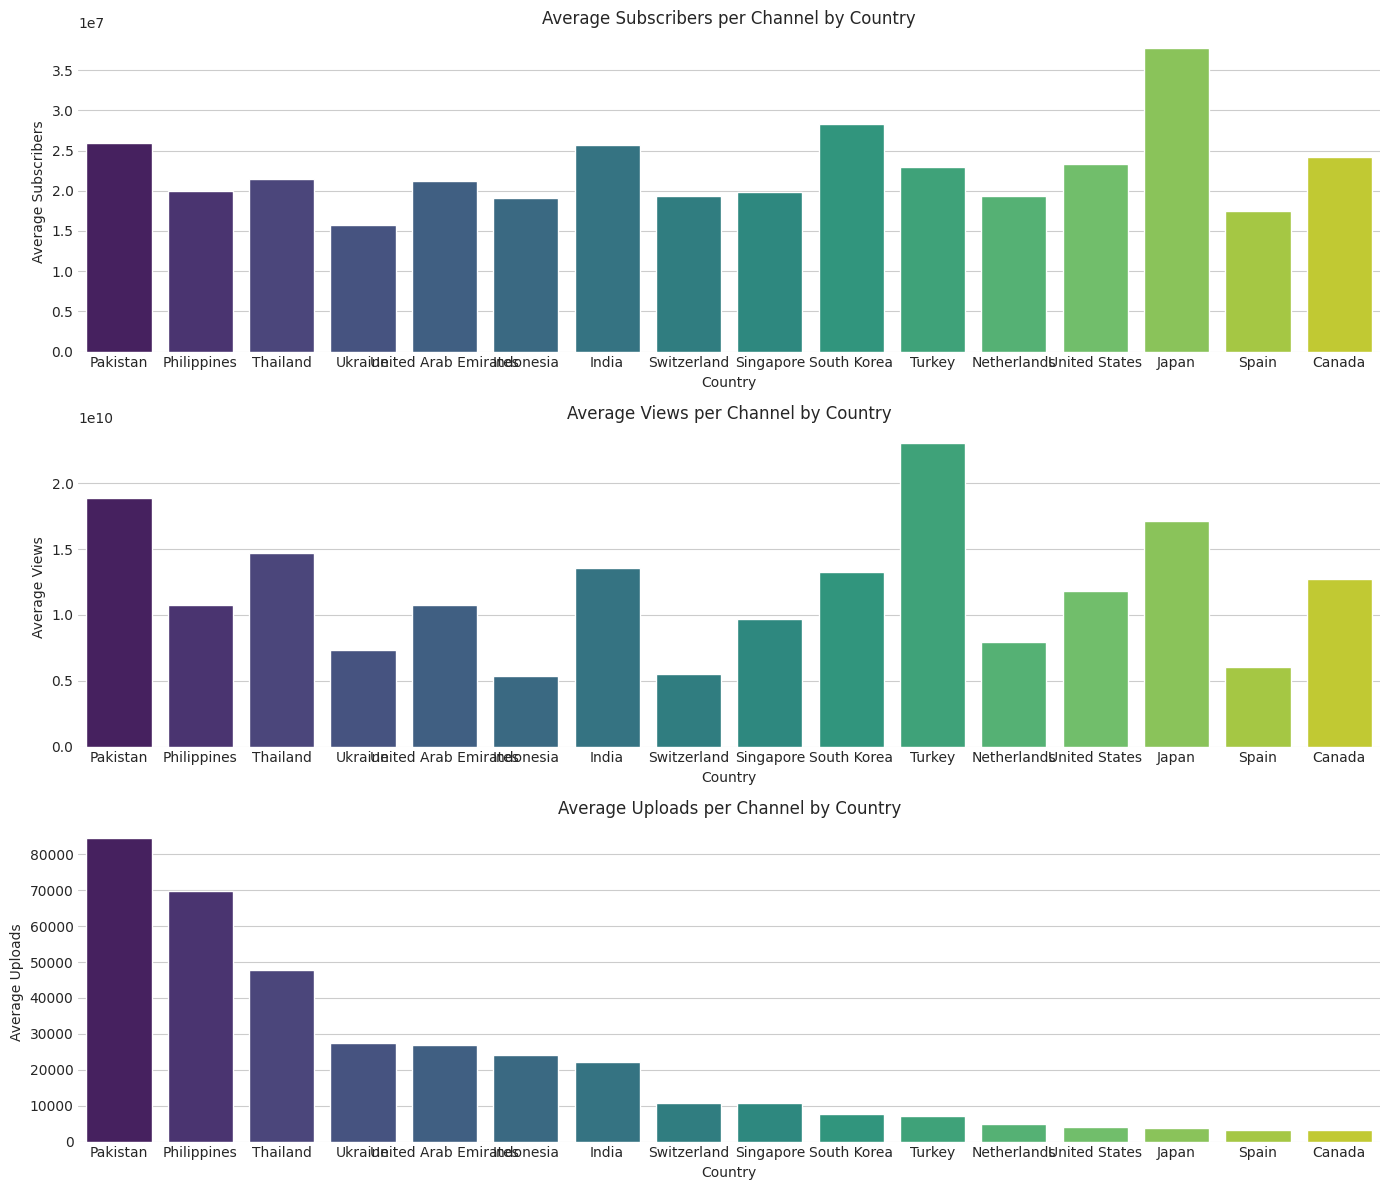

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with missing country data
df_filtered = df.dropna(subset=['Country'])

# Calculate average subscribers, views, and uploads per channel for each country
country_metrics = df_filtered.groupby('Country').agg({'subscribers': 'mean', 'video views': 'mean', 'uploads': 'mean'})

# Select the top 15 countries by number of channels
top_15_countries = country_metrics.nlargest(15, 'uploads')

# Retrieve data for Canada
canada_metrics = country_metrics.loc[['Canada']]

# Concatenate Canada data with the top 15 countries
top_countries_data = pd.concat([top_15_countries, canada_metrics])

# Plot performance metrics by country
plt.figure(figsize=(14, 12))

plt.subplot(3, 1, 1)
sns.barplot(x=top_countries_data.index, y=top_countries_data['subscribers'], palette='viridis')
plt.title('Average Subscribers per Channel by Country')
plt.ylabel('Average Subscribers')

plt.subplot(3, 1, 2)
sns.barplot(x=top_countries_data.index, y=top_countries_data['video views'], palette='viridis')
plt.title('Average Views per Channel by Country')
plt.ylabel('Average Views')

plt.subplot(3, 1, 3)
sns.barplot(x=top_countries_data.index, y=top_countries_data['uploads'], palette='viridis')
plt.title('Average Uploads per Channel by Country')
plt.ylabel('Average Uploads')

plt.tight_layout()
plt.show()


# **What insights can we gain from comparing the total yearly earnings of YouTube channels across different countries?**

<ipython-input-40-da52c477bcb6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_earnings.values, y=country_earnings.index, palette='viridis')


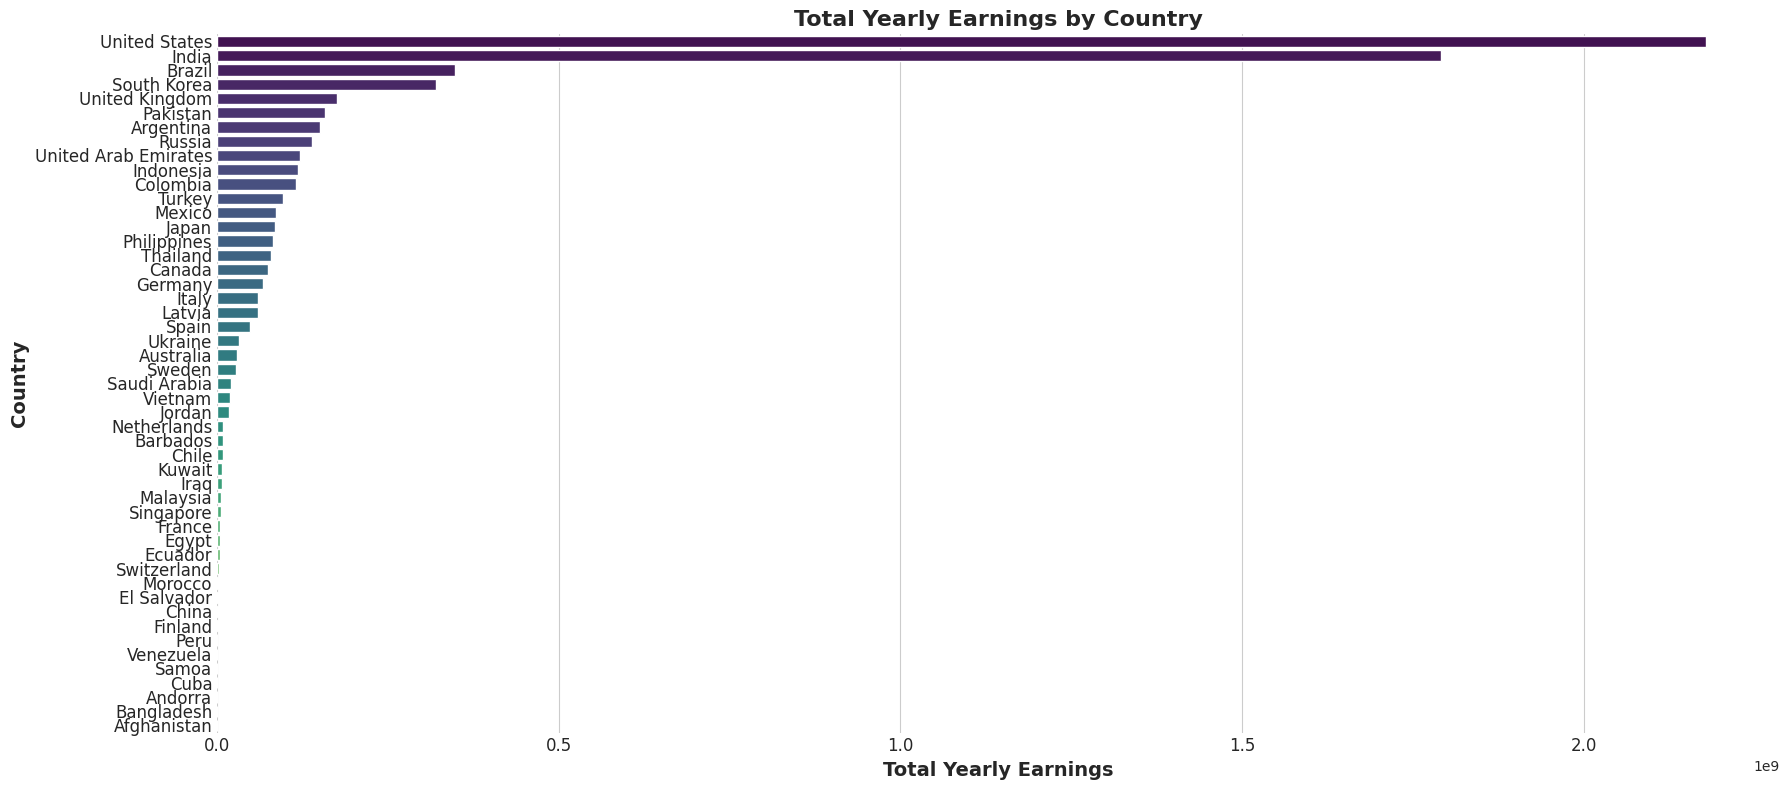

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with missing country and earnings data
df_filtered = df.dropna(subset=['Country', 'highest_yearly_earnings'])

# Group the data by country and calculate total yearly earnings
country_earnings = df_filtered.groupby('Country')['highest_yearly_earnings'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(18, 8))
sns.barplot(x=country_earnings.values, y=country_earnings.index, palette='viridis')
plt.xlabel('Total Yearly Earnings', fontsize=14, fontweight='bold')
plt.ylabel('Country', fontsize=14, fontweight='bold')
plt.title('Total Yearly Earnings by Country', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


#**What are the top categories of YouTube channels among the top 15 countries?**

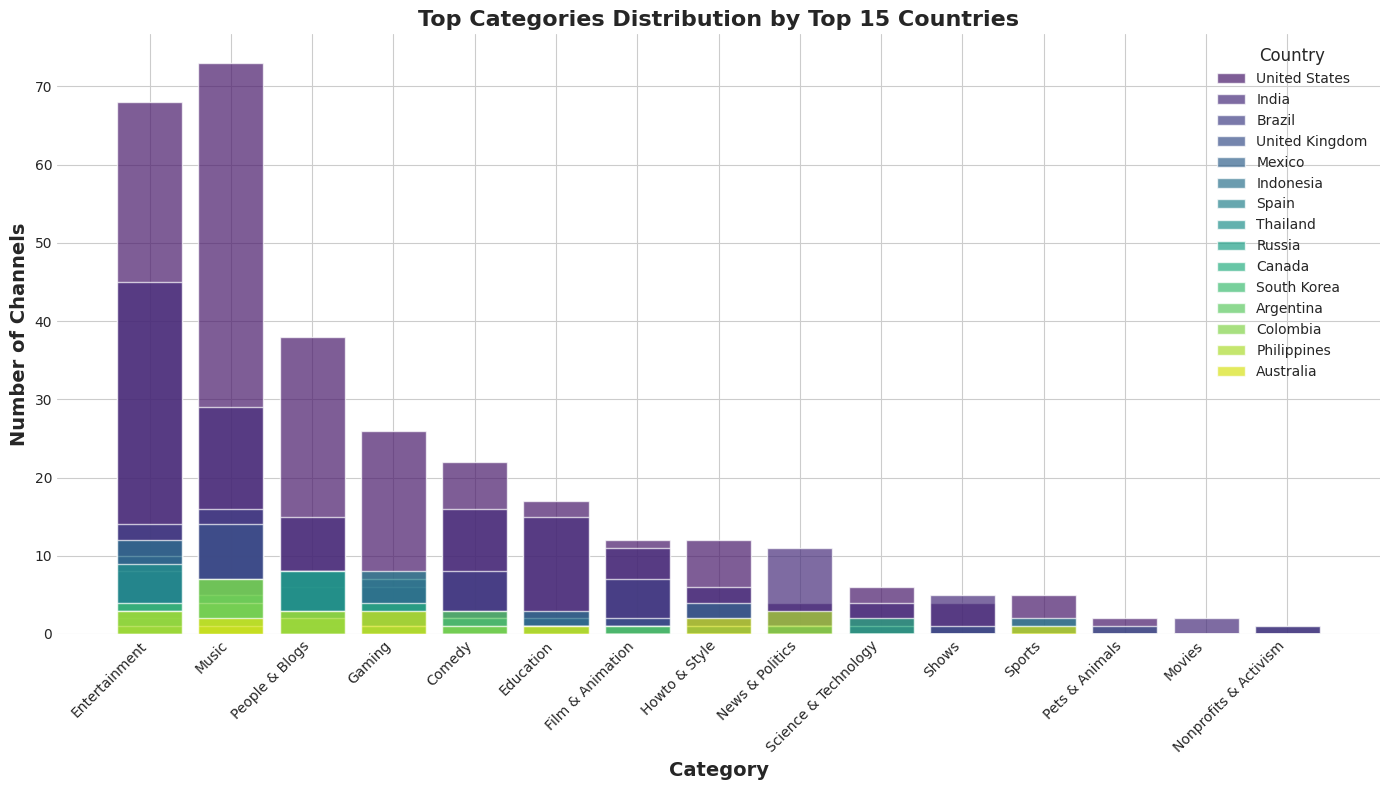

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with missing country and category data
df_filtered = df.dropna(subset=['Country', 'category'])

# Group the data by country and category and calculate the count of channels
category_distribution = df_filtered.groupby(['Country', 'category']).size().unstack(fill_value=0)

# Select the top N countries by total channel count
top_countries = category_distribution.sum(axis=1).nlargest(15).index.tolist()

# Filter category distribution to include only top countries
category_distribution = category_distribution.loc[top_countries]

# Select the top N categories across all countries
top_categories = category_distribution.sum().nlargest(15).index.tolist()

# Filter category distribution to include only top categories
category_distribution = category_distribution[top_categories]

# Plotting
plt.figure(figsize=(14, 8))

# Define colors for each category
colors = sns.color_palette('viridis', len(top_countries))

# Loop through each country and plot grouped bars for top categories
for i, country in enumerate(category_distribution.index):
    country_categories_counts = category_distribution.loc[country]
    plt.bar(x=range(len(top_categories)), height=country_categories_counts, label=country, color=colors[i], alpha=0.7)

# Add category labels to x-axis
plt.xticks(range(len(top_categories)), top_categories, fontsize=10, rotation=45, ha='right')

plt.xlabel('Category', fontsize=14, fontweight='bold')
plt.ylabel('Number of Channels', fontsize=14, fontweight='bold')
plt.title('Top Categories Distribution by Top 15 Countries', fontsize=16, fontweight='bold')
plt.legend(title='Country', fontsize=10, title_fontsize='12')
plt.tight_layout()
plt.show()



#**Category Distribution in Canada**

<ipython-input-50-a178e0ce8e50>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution_canada.index, y=category_distribution_canada.values, palette='viridis')


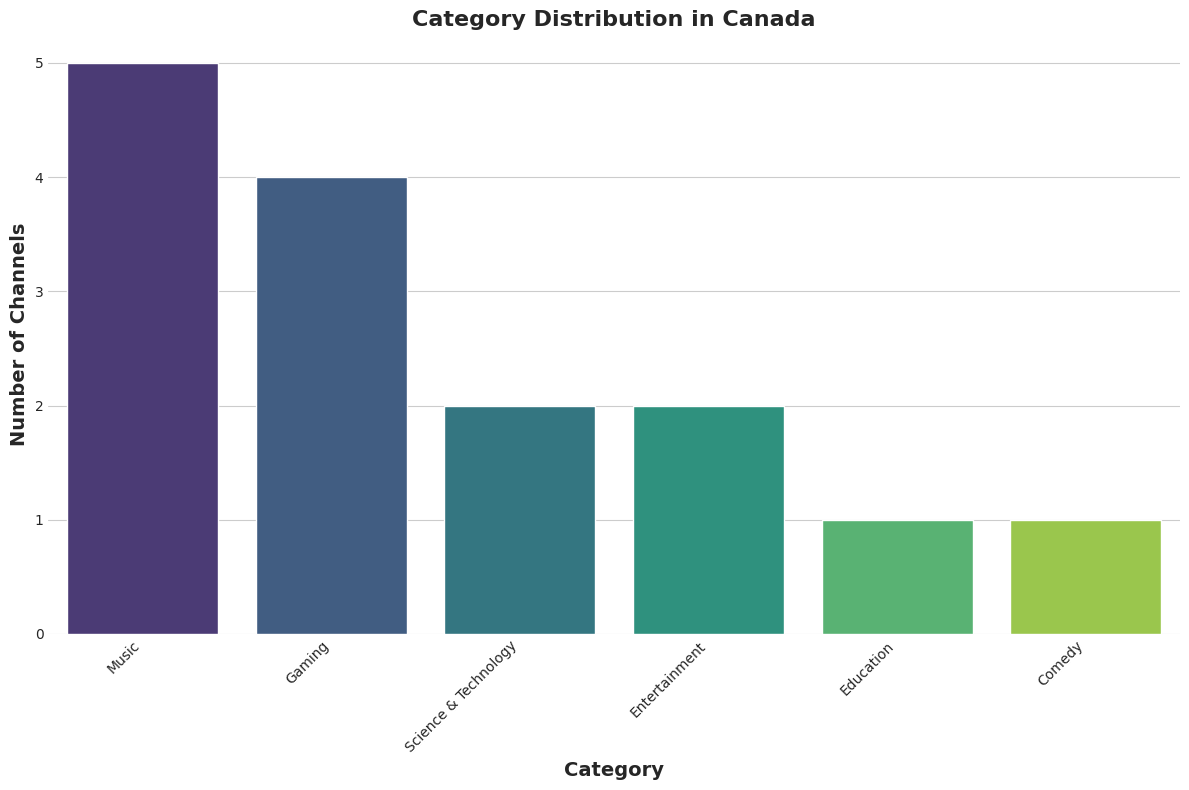

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with missing country and category data
df_filtered = df.dropna(subset=['Country', 'category'])

# Filter the data to include only channels from Canada
df_canada = df_filtered[df_filtered['Country'] == 'Canada']

# Group the data by category and calculate the count of channels
category_distribution_canada = df_canada['category'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))

# Plot the bar plot for category distribution in Canada
sns.barplot(x=category_distribution_canada.index, y=category_distribution_canada.values, palette='viridis')
plt.xlabel('Category', fontsize=14, fontweight='bold')
plt.ylabel('Number of Channels', fontsize=14, fontweight='bold')
plt.title('Category Distribution in Canada', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [28]:
df_geo_subscribers = df.groupby('Country')['subscribers'].mean().reset_index()
df_geo_subscribers.sort_values( 'subscribers', inplace=True, ascending=False )
df_geo_subscribers = df_geo_subscribers.head(20)

#**calculate the average monthly profitability for each category of YouTube channels**

<ipython-input-51-4b1b015465b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_profitability_by_category.values, y=average_profitability_by_category.index, palette='viridis')


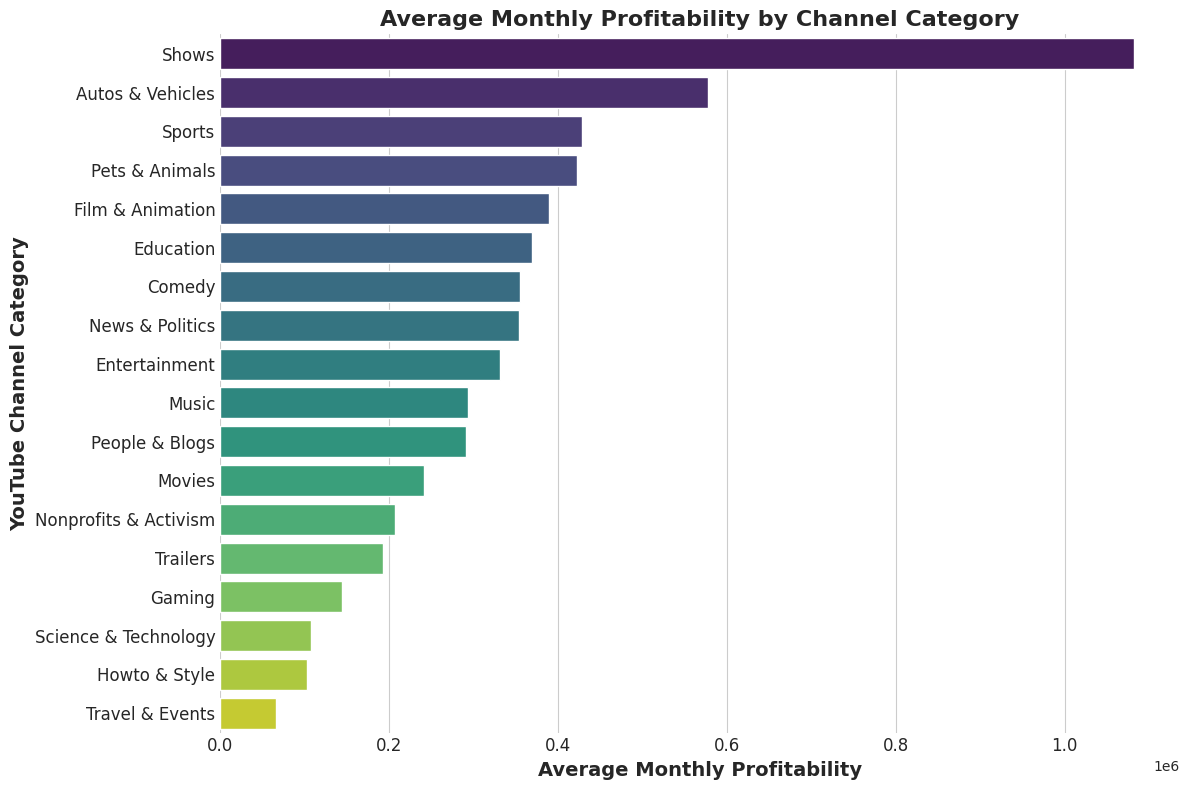

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average monthly profitability for each category
df['average_monthly_profitability'] = (df['lowest_monthly_earnings'] + df['highest_monthly_earnings']) / 2
average_profitability_by_category = df.groupby('category')['average_monthly_profitability'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=average_profitability_by_category.values, y=average_profitability_by_category.index, palette='viridis')
plt.xlabel('Average Monthly Profitability', fontsize=14, fontweight='bold')
plt.ylabel('YouTube Channel Category', fontsize=14, fontweight='bold')
plt.title('Average Monthly Profitability by Channel Category', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# **Distribution of YouTube Channels by Year Created**

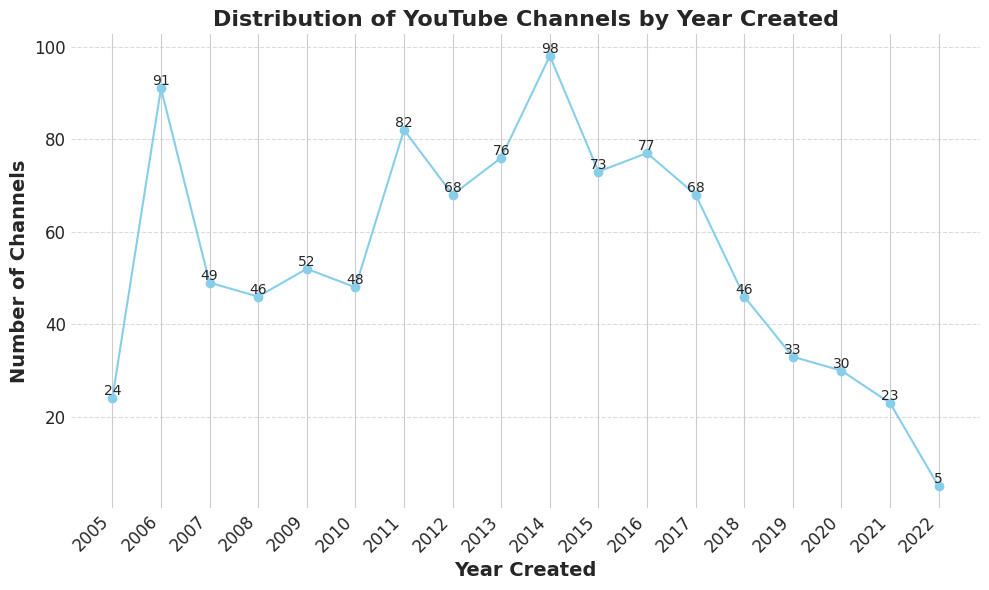

In [53]:
import matplotlib.pyplot as plt

# Count the number of channels created each year
channel_counts = df['created_year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(channel_counts.index, channel_counts.values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year Created', fontsize=14, fontweight='bold')
plt.ylabel('Number of Channels', fontsize=14, fontweight='bold')
plt.title('Distribution of YouTube Channels by Year Created', fontsize=16, fontweight='bold')
plt.xticks(channel_counts.index, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations for the number of channels on each point
for year, count in zip(channel_counts.index, channel_counts.values):
    plt.text(year, count, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



#**Multivariate Analysis of YouTube Channel Features**

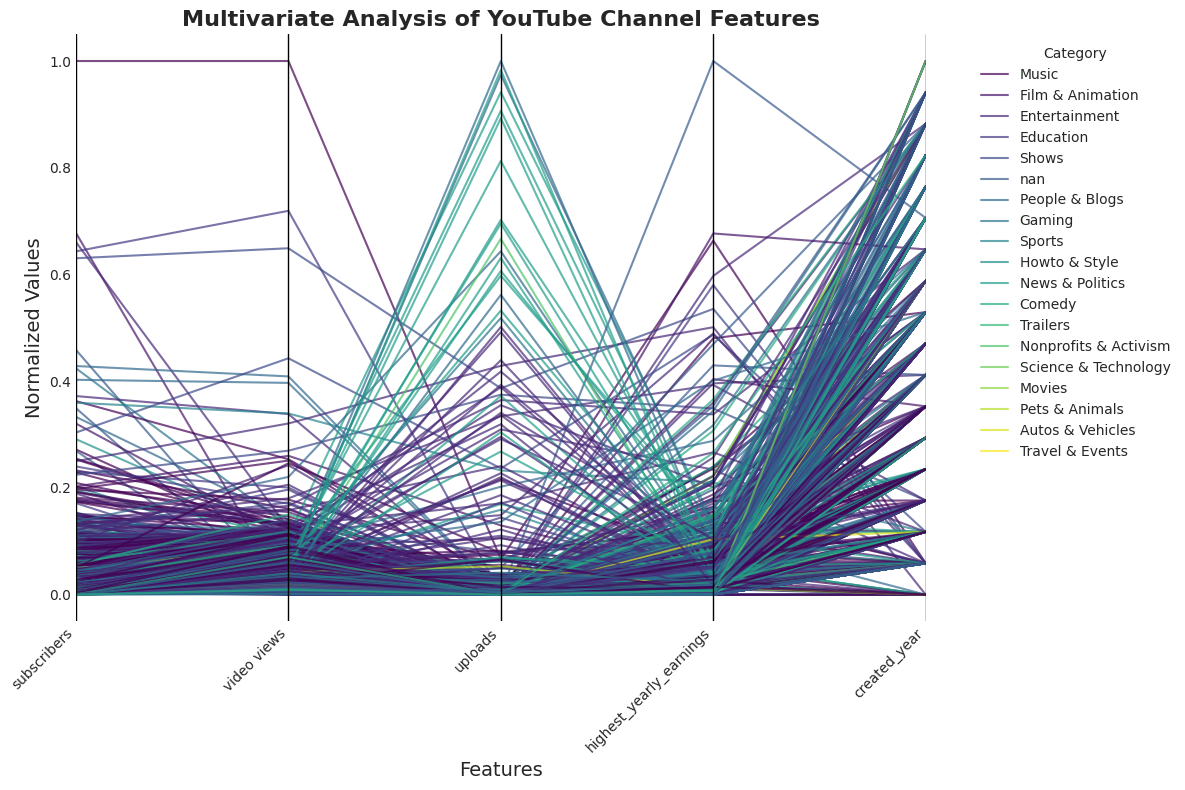

In [56]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Select relevant data features for analysis
features = ['subscribers', 'video views', 'uploads', 'highest_yearly_earnings', 'created_year']

# Filter the DataFrame to include only the selected features
data_for_analysis = df[features]

# Normalize the data for better visualization
data_normalized = (data_for_analysis - data_for_analysis.min()) / (data_for_analysis.max() - data_for_analysis.min())

# Add the 'category' column for color mapping
data_normalized['category'] = df['category']

# Plot parallel coordinates
plt.figure(figsize=(12, 8))
parallel_coordinates(data_normalized, 'category', colormap='viridis', alpha=0.7)
plt.title('Multivariate Analysis of YouTube Channel Features', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Normalized Values', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()